In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress





In [88]:
# Study data files
mouse_metadata_path = "Mouse_metadata.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [89]:
study_results_path = "Study_results.csv"
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [90]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_data.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice.
mice_num = combined_data["Mouse ID"].nunique()
mice_num


249

In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [191]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= combined_data[combined_data["Mouse ID"].isin(duplicate_mice)==False]
clean_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
# Checking the number of mice in the clean DataFrame.
clean_mice_num= clean_df ["Mouse ID"].nunique()
clean_mice_num


248

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
variance= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
stand_dev= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
SEM= clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

sum_stat= pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":stand_dev, 
                           "Tumor Volume Std. Err.":SEM})

sum_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

aggregate_sum =  clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
aggregate_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [109]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_total = clean_df["Drug Regimen"].value_counts()
mice_total

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Number of Mice per Treatment')

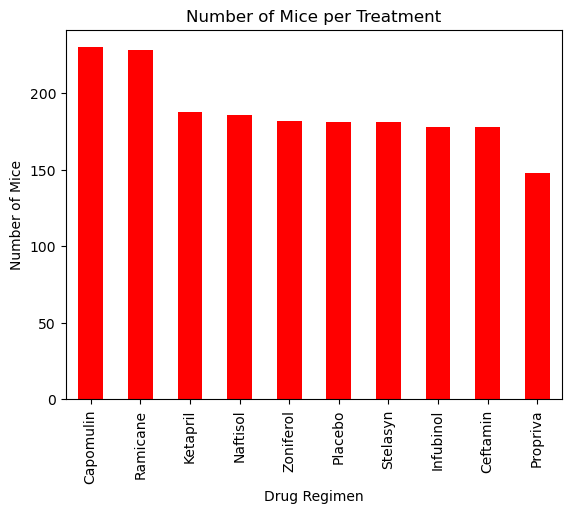

In [113]:

plot_pandas = mice_total.plot.bar(color="r")  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

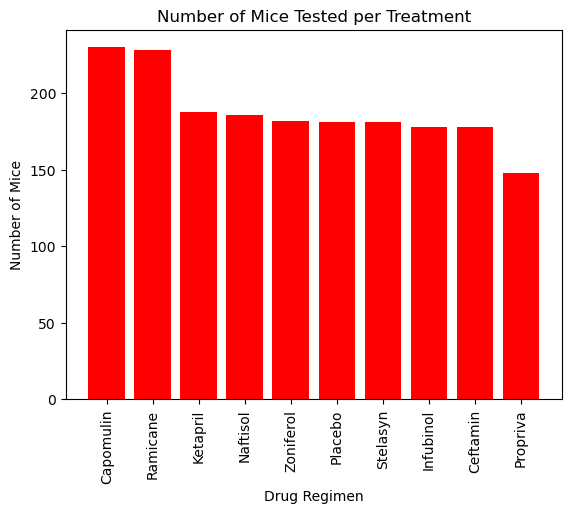

In [116]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mice_total.index.values
y_axis = mice_total.values

plt.bar(x_axis, y_axis, color="r", alpha=1, align="center")
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

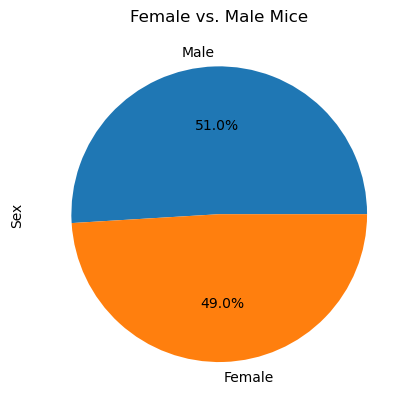

In [190]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

female_male = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
female_male.plot.pie(autopct= "%1.1f%%")
plt.show()

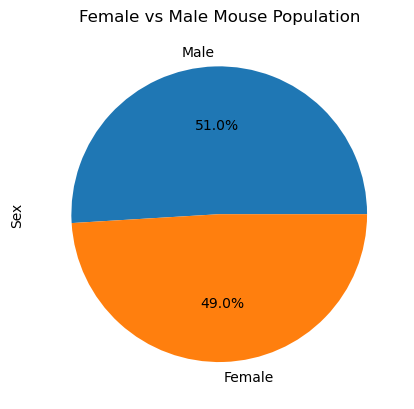

In [124]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7, 50.2]
plot = female_male.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Female vs Male Mouse Population")
plt.ylabel("Sex")
plt.show()

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, # Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


    
#Capomulin tumor

Capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]
Capomulin_great = Capomulin.groupby("Mouse ID").max()["Timepoint"]
Capomulin_volume = pd.DataFrame(Capomulin_great)
Capomulin_merge = pd.merge(Capomulin_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [131]:
Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumor.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"Upper quartile of Capomulin tumors: {upperq}")
print(f"Lower quartile of Capomulin tumor: {lowerq}")
print(f"Median of Capomulin tumors: {quartiles[0.5]} ")
print(f"Interquartile range of Capomulin tumors: {iqr}")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values below {lower_bound} are potenial outliers.")
print(f"Values above {upper_bound} are potenial outliers.")


Upper quartile of Capomulin tumors: 40.1592203
Lower quartile of Capomulin tumor: 32.37735684
Median of Capomulin tumors: 38.1251644 
Interquartile range of Capomulin tumors: 7.781863460000004
Values below 20.70456164999999 are potenial outliers.
Values above 51.83201549 are potenial outliers.


In [137]:
 # Ramicane tumor

Ramicane = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]  
Ramicane_great = Ramicane.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_great)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

    

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [147]:
Ramicane_merge.to_csv("output.csv")
Ramicane_tumor = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumor.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"Upper quartile of Ramicane tumors is: {upperq}")
print(f"Lower quartile of Ramicane tumors is: {lowerq}")
print(f"Median of Ramicane tumors is: {quartiles[0.5]} ")
print(f"Interquartile range of Ramicane tumors is: {iqr}")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values above {upper_bound} are potenial outliers.")
print(f"Values below {lower_bound} are potenial outliers.")


    

Upper quartile of Ramicane tumors is: 40.65900627
Lower quartile of Ramicane tumors is: 31.56046955
Median of Ramicane tumors is: 36.56165229 
Interquartile range of Ramicane tumors is: 9.098536719999998
Values above 54.30681135 are potenial outliers.
Values below 17.912664470000003 are potenial outliers.


In [140]:
# Infubinol tumor
Infubinol = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:] 
Infubinol_great = Infubinol.groupby("Mouse ID").max()["Timepoint"]
Infubinol_volume = pd.DataFrame(Infubinol_great)
Infubinol_merge = pd.merge(Infubinol_volume, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [148]:
Infubinol_tumor = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumor.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]

iqr = upperq-lowerq

print(f"Upper quartile of Infubinol tumors is: {upperq}")
print(f"Lower quartile of Infubinol tumors is: {lowerq}")
print(f"Median of Infubinol tumors is: {quartiles[0.5]} ")
print(f"Interquartile range of Infubinol tumors is: {iqr}")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values above {upper_bound} are potenial outliers.")
print(f"Values below {lower_bound} are potenial outliers.")

Infubinol_merge.to_csv("output.csv")

Upper quartile of Infubinol tumors is: 65.52574285
Lower quartile of Infubinol tumors is: 54.04860769
Median of Infubinol tumors is: 60.16518046 
Interquartile range of Infubinol tumors is: 11.477135160000003
Values above 82.74144559000001 are potenial outliers.
Values below 36.83290494999999 are potenial outliers.


In [143]:
# Ceftamin tumor
Ceftamin = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:] 
Ceftamin_great = Ceftamin.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_volumn = pd.DataFrame(Ceftamin_great)
Ceftamin_merge = pd.merge(Ceftamin_volumn, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [175]:
Ceftamin_tumor = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumor.quantile([.25,.5,.75])
upperq = quartiles[0.75]
lowerq = quartiles[0.25]
iqr = upperq-lowerq

print(f"Upper quartile of temperatures is: {upperq}")
print(f"Lower quartile of treatment is: {lowerq}")
print(f"Median of temperatures is: {quartiles[0.5]} ")
print(f"Interquartile range of temperatures is: {iqr}")

upper_bound = upperq + (1.5*iqr)
lower_bound = lowerq - (1.5*iqr)

print(f"Values above {upper_bound} are potenial outliers.")
print(f"Values below {lower_bound} are potenial outliers.")


Upper quartile of temperatures is: 64.29983003
Lower quartile of treatment is: 48.72207785
Median of temperatures is: 59.85195552 
Interquartile range of temperatures is: 15.577752179999997
Values above 87.66645829999999 are potenial outliers.
Values below 25.355449580000002 are potenial outliers.


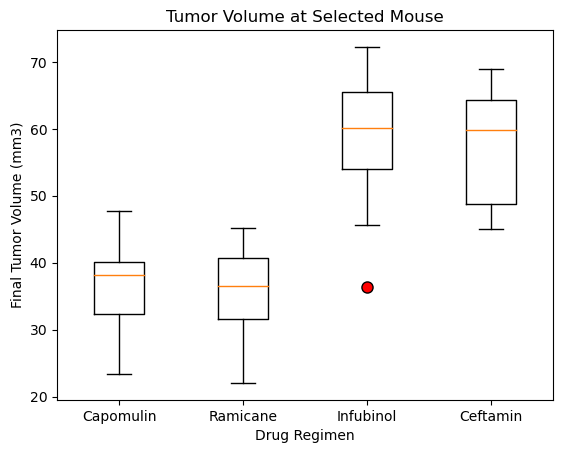

In [176]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig, ax1 = plt.subplots()
flierprops = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8,
              'linestyle': 'none', 'markeredgecolor': 'black'}
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True,flierprops=flierprops) 

plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

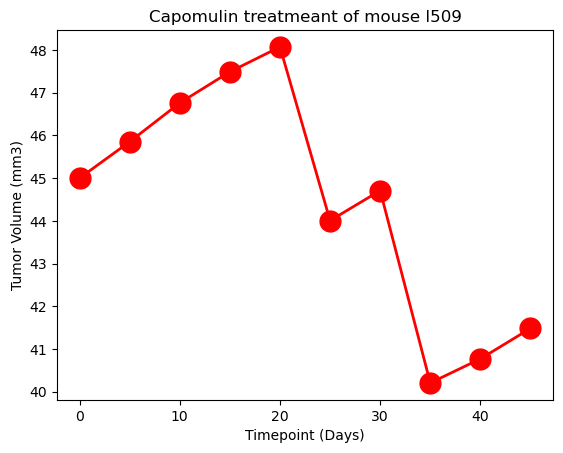

In [180]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

lineplot= Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
lineplot.head()
x_axis = lineplot["Timepoint"]
tumor_size = lineplot["Tumor Volume (mm3)"]

fig, ax = plt.subplots()
plt.title("Capomulin treatmeant of mouse l509")
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

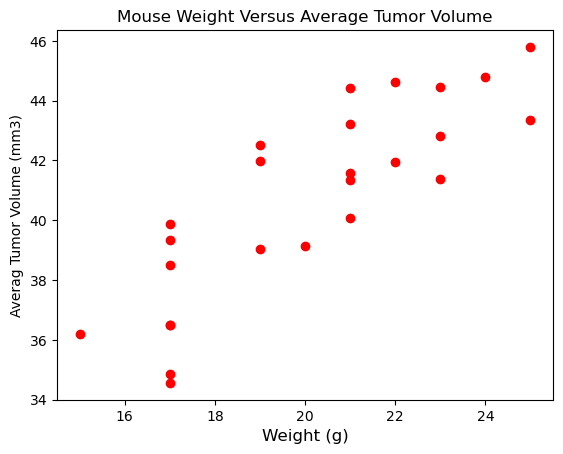

In [181]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig, ax = plt.subplots()
avg_tumor_vol =Capomulin.groupby(['Mouse ID']).mean()

marker_size=14
plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"], color="red")
plt.title("Mouse Weight Versus Average Tumor Volume")
plt.xlabel("Weight (g)",fontsize =12)
plt.ylabel("Averag Tumor Volume (mm3)")

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg_tumor_vol['Weight (g)'],avg_tumor_vol['Tumor Volume (mm3)'])
print(f"Correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")






Correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


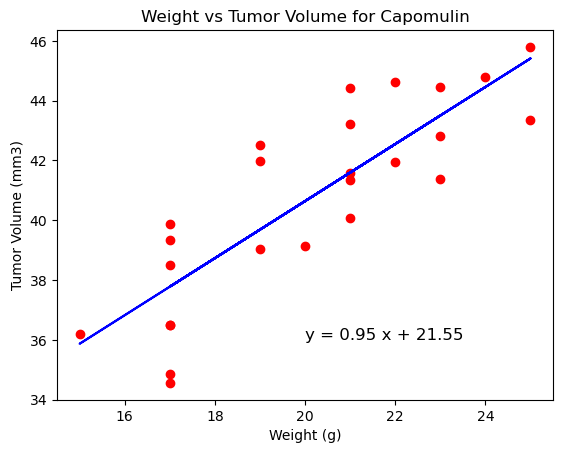

In [189]:
(slope,intercept,rvalue,pvalue,std)=linregress(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"])
regression_val=avg_tumor_vol["Weight (g)"]* slope + intercept
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(avg_tumor_vol["Weight (g)"],avg_tumor_vol["Tumor Volume (mm3)"],color='red')
plt.plot(avg_tumor_vol["Weight (g)"], regression_val, color='blue')
plt.annotate(linear_eq,(20,36), fontsize=12)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()